# Question 2

### 1.
	(10 pts) Implement a function, “coin_flip_prop”, that calculates the probability of having heads (h) using NumPy.random.binomial(k,π,t)=h, where k is the number of coins, π is the probability of each coin, t is the number of total flips, and h is head. To confirm the coin_flip_prop function applicability, show that the probability reaches 0.5 as N increases  

In [1337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(12)

In [1338]:
def coin_flip_prop(k, prob, t):
    heads = 1
    tails = 0
    a = sum(np.random.binomial(k, prob, t) == heads)/t
    return a

In [1339]:
arr = []

for N in range(1,201):
    arr.insert(N, coin_flip_prop(1, 0.5, 50*N))

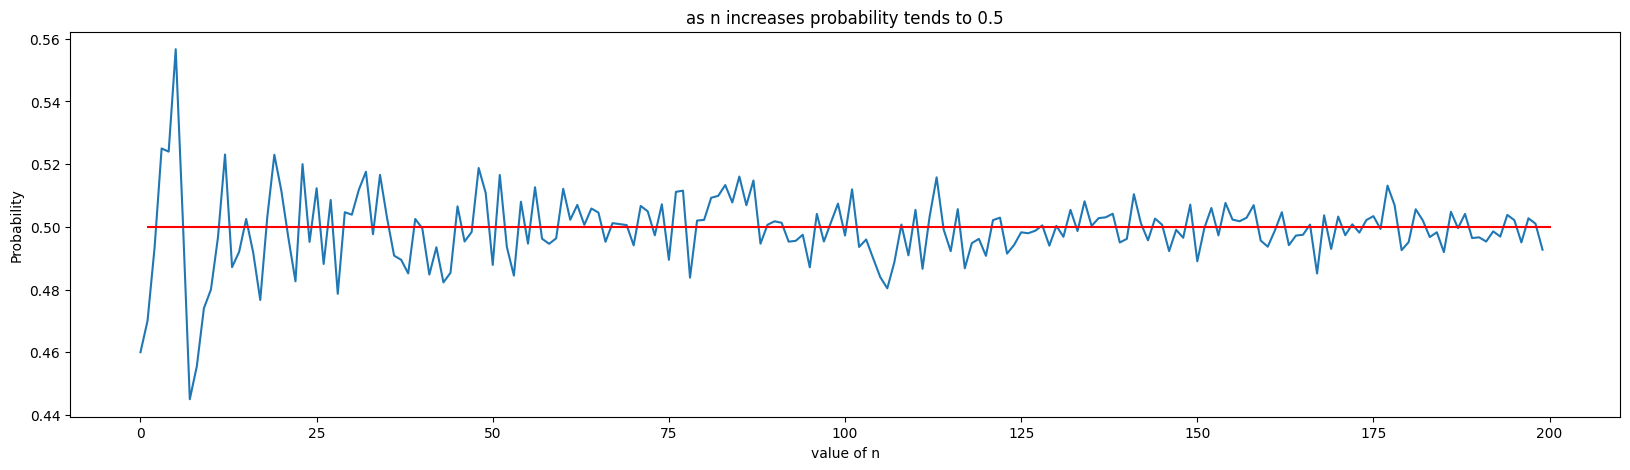

In [1340]:
x = [i for i in range(1, 201)]
y = [0.5 for i in range(1, 201)]

plt.figure(figsize=(20, 5))
plt.title("as n increases probability tends to 0.5")
plt.xlabel("value of n")
plt.ylabel("Probability")
plt.plot(arr)
plt.plot(x, y, color='red')

### 2. Refer PDF 
	(5 pts) Numerically calculate the probability of having 2 heads (h=2) when 5 coins (k=5) are flipped. 

### 3.
	(5 pts) Run the coin_flip_prop function above for N=[1,…,200]. Report the average probability. 

In [1341]:
print("The average probability is", sum(arr)/len(arr))

The average probability is 0.499196005525893


# Question 3
There are two data files provided (d1: GDP.csv, d2: Country.csv). The task of this problem is to practice data mining and exploratory data analysis (EDA) to learn about the data. 




### 1.	(5 pts) Load two data files, d1 and d2, and merge two files using the country code. How many countries were merged? 


In [1342]:
df_country = pd.read_csv("Country.csv", encoding='latin-1')
df_gdp = pd.read_csv("GDP.csv", header = None,skiprows=[0], usecols=[0,1,3,4],nrows=232 , encoding='latin-1')

df_gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']

In [1343]:
df_gdp.isnull().sum()

CountryCode     4
Rank           42
CountryName     4
GDP             5
dtype: int64

In [1344]:
# clean the data set 
df_gdp=df_gdp[df_gdp['CountryCode'].notna()]
df_gdp=df_gdp[df_gdp['Rank'].notna()]
df_gdp=df_gdp[df_gdp['CountryName'].notna()]
df_gdp=df_gdp[df_gdp['GDP'].notna()]
df_gdp.isnull().sum()

CountryCode    0
Rank           0
CountryName    0
GDP            0
dtype: int64

In [1345]:
df_country.head()

,CountryCode,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,ABW,Aruba,High income: nonOECD,Latin America & Caribbean,NaN,NaN,Aruban florin,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,2008.0,NaN,AW,AW,Aruba,Aruba
1,ADO,Principality of Andorra,High income: nonOECD,Europe & Central Asia,NaN,NaN,Euro,Register based,NaN,NaN,...,NaN,Yes,NaN,NaN,2006.0,NaN,AD,AD,Andorra,Andorra
2,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"MICS, 2003",Fiscal year end: March 20; reporting period fo...,...,NaN,NaN,NaN,NaN,2008.0,2000.0,AF,AF,Afghanistan,Afghanistan
3,AGO,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,IDA,NaN,Angolan kwanza,1970,"MICS, 2001, MIS, 2006/07",NaN,...,"IHS, 2000",NaN,1964-65,NaN,1991.0,2000.0,AO,AO,Angola,Angola
4,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2001,"MICS, 2005",NaN,...,"LSMS, 2005",Yes,1998,2005.0,2008.0,2000.0,AL,AL,Albania,Albania


In [1346]:
df_gdp.head()

,CountryCode,Rank,CountryName,GDP
0,USA,1.0,United States,"16,244,600"
1,CHN,2.0,China,"8,227,103"
2,JPN,3.0,Japan,"5,959,718"
3,DEU,4.0,Germany,"3,428,131"
4,FRA,5.0,France,"2,612,878"


In [1347]:
df_country["CountryCode"].count()

234

In [1348]:
df_gdp["CountryCode"].count()

190

In [1349]:
df_gdp_countrycode = pd.merge(df_gdp, df_country, how='inner', on="CountryCode")
df_gdp_countrycode

,CountryCode,Rank,CountryName,GDP,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,USA,1.0,United States,"16,244,600",United States of America,High income: OECD,North America,NaN,NaN,U.S. dollar,...,LFS 2000,Yes,1997/2002,2004.0,2008.0,2000.0,US,US,United States,United States
1,CHN,2.0,China,"8,227,103",People's Republic of China,Lower middle income,East Asia & Pacific,IBRD,NaN,Chinese yuan,...,"IHS, 2005",NaN,1997,2005.0,2008.0,2000.0,CN,CN,China,China
2,JPN,3.0,Japan,"5,959,718",Japan,High income: OECD,East Asia & Pacific,NaN,NaN,Japanese yen,...,"IS, 1993",Yes,2000,2004.0,2008.0,2000.0,JP,JP,Japan,Japan
3,DEU,4.0,Germany,"3,428,131",Federal Republic of Germany,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"IHS, 2000",Yes,1999-2000,2004.0,2008.0,2000.0,DE,DE,Germany,Germany
4,FRA,5.0,France,"2,612,878",French Republic,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"ES/BS, 1994/95",Yes,1999-2000,2004.0,2008.0,2000.0,FR,FR,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,STP,186.0,São Tomé and Principe,263,Democratic Republic of São Tomé and Principe,Lower middle income,Sub-Saharan Africa,IDA,HIPC,São Tomé and Principe dobra,...,PS 2000-01,NaN,NaN,NaN,2008.0,NaN,ST,ST,São Tomé and Principe,São Tomé and Principe
185,PLW,187.0,Palau,228,Republic of Palau,Upper middle income,East Asia & Pacific,IBRD,NaN,U.S. dollar,...,NaN,Yes,NaN,NaN,NaN,NaN,PW,PW,Palau,Palau
186,MHL,188.0,Marshall Islands,182,Republic of the Marshall Islands,Lower middle income,East Asia & Pacific,IBRD,NaN,U.S. dollar,...,NaN,NaN,NaN,NaN,NaN,NaN,MH,MH,Marshall Islands,Marshall Islands
187,KIR,189.0,Kiribati,175,Republic of Kiribati,Lower middle income,East Asia & Pacific,IDA,NaN,Australian dollar,...,NaN,NaN,NaN,NaN,2005.0,NaN,KI,KI,Kiribati,Kiribati


### 2.	(5 pts) Visualize the number of countries in each region and report the region having the most and the least number of countries. 


In [1350]:
x = df_gdp_countrycode["Region"].unique()
y = df_gdp_countrycode["Region"].value_counts()


In [1351]:
x.sort()
x

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

In [1352]:
y=y.sort_index()
y

East Asia & Pacific           29
Europe & Central Asia         50
Latin America & Caribbean     35
Middle East & North Africa    18
North America                  3
South Asia                     8
Sub-Saharan Africa            46
Name: Region, dtype: int64

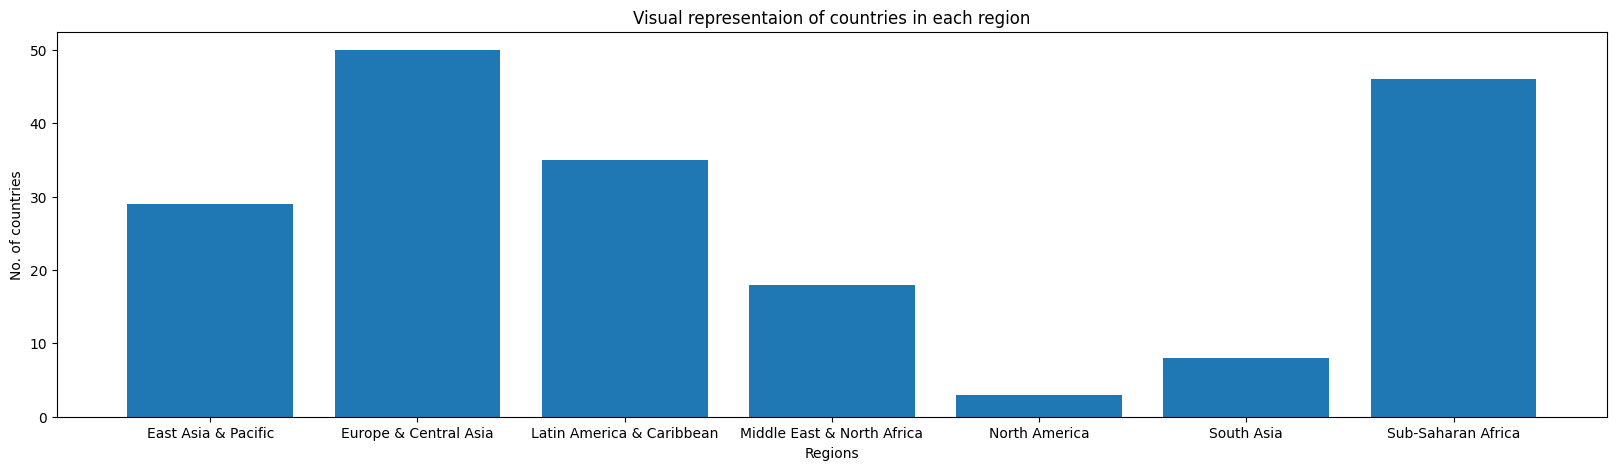

In [1353]:
plt.figure(figsize=(20,5))
plt.xlabel("Regions",)
plt.ylabel("No. of countries")
plt.title("Visual representaion of countries in each region")
plt.bar(x,y)
plt.show()

### 3.	(5 pts) Compare the GDP distribution of each region and determine the regions having a similar GDP distribution using KS-test. Report the regions. 


In [1354]:
# had to join as it was concatenating all data without spaces and wouldnt work with the split function ahead
gdp_per_region = df_gdp_countrycode.groupby(['Region'])['GDP'].agg(lambda x: ' '.join(set(x)))

gdp_per_region

Region
East Asia & Pacific           1,008 228 16,954 326 274,701 472 40 43,582 155...
Europe & Central Asia         2,014,670 17,466 6,445 51,113 35,164 394,708 6...
Latin America & Caribbean     101,496 475,502 480 10,507 381,286 713 8,149 4...
Middle East & North Africa    42,945 8,722 258,217 45,662 348,595 35,646 514...
North America                                        16,244,600 5,474 1,821,424
South Asia                    116,355 59,423 1,780 2,222 225,143 20,497 18,9...
Sub-Saharan Africa            13,072 25,322 19,881 17,204 263 6,773 40,711 1...
Name: GDP, dtype: object

In [1355]:
EAP = gdp_per_region[0].split()
ECA = gdp_per_region[1].split()
LAC = gdp_per_region[2].split()
MENA = gdp_per_region[3].split()
NA = gdp_per_region[4].split()
SA = gdp_per_region[5].split()
SSA = gdp_per_region[6].split()
gpr = [EAP, ECA, LAC, MENA, NA, SA, SSA]
gpr_arr = ["EAP", "ECA", "LAC", "MENA", "NA", "SA", "SSA"]

In [1356]:
from scipy.stats import ks_2samp
stat = {}
p_val = {}

for i in range(len(gpr)):
    for j in range(i+1, len(gpr)):
        stat[gpr_arr[i]+'-'+gpr_arr[j]], p_val[gpr_arr[i]+'-'+gpr_arr[j]] = ks_2samp(gpr[i], gpr[j])


In [1357]:
stat

{'EAP-ECA': 0.27379310344827584,
 'EAP-LAC': 0.17849898580121704,
 'EAP-MENA': 0.3103448275862069,
 'EAP-NA': 0.39080459770114945,
 'EAP-SA': 0.46120689655172414,
 'EAP-SSA': 0.11619190404797601,
 'ECA-LAC': 0.1564705882352941,
 'ECA-MENA': 0.17777777777777778,
 'ECA-NA': 0.5666666666666667,
 'ECA-SA': 0.515,
 'ECA-SSA': 0.2426086956521739,
 'LAC-MENA': 0.24183006535947713,
 'LAC-NA': 0.46078431372549017,
 'LAC-SA': 0.5220588235294118,
 'LAC-SSA': 0.170076726342711,
 'MENA-NA': 0.6666666666666666,
 'MENA-SA': 0.6527777777777778,
 'MENA-SSA': 0.34541062801932365,
 'NA-SA': 0.2916666666666667,
 'NA-SSA': 0.38405797101449274,
 'SA-SSA': 0.41847826086956524}

In [1358]:
p_val

{'EAP-ECA': 0.10097010509209532,
 'EAP-LAC': 0.620147570542986,
 'EAP-MENA': 0.1805890146990459,
 'EAP-NA': 0.6661290322580644,
 'EAP-SA': 0.09913546460036021,
 'EAP-SSA': 0.9385183293673833,
 'ECA-LAC': 0.6311778404946703,
 'ECA-MENA': 0.7273721456217954,
 'ECA-NA': 0.22479296508153335,
 'ECA-SA': 0.03305444536905447,
 'ECA-SSA': 0.09664174523993692,
 'LAC-MENA': 0.4227596609711092,
 'LAC-NA': 0.48931788931788933,
 'LAC-SA': 0.03795142742511163,
 'LAC-SSA': 0.5564255218187326,
 'MENA-NA': 0.14436090225563913,
 'MENA-SA': 0.009827975228432899,
 'MENA-SSA': 0.0690441116491449,
 'NA-SA': 0.9757575757575755,
 'NA-SSA': 0.677594442032132,
 'SA-SSA': 0.13592469003714192}

In [1359]:

ks_test_table = {"statistic": stat, "p-value": p_val}
df_ks_test = pd.DataFrame(ks_test_table)
df_ks_test


,statistic,p-value
EAP-ECA,0.273793,0.100970
EAP-LAC,0.178499,0.620148
EAP-MENA,0.310345,0.180589
EAP-NA,0.390805,0.666129
EAP-SA,0.461207,0.099135
EAP-SSA,0.116192,0.938518
ECA-LAC,0.156471,0.631178
ECA-MENA,0.177778,0.727372
ECA-NA,0.566667,0.224793
ECA-SA,0.515000,0.033054


In [1360]:

#Different distribution
df_ks_test[df_ks_test["p-value"] <= 0.08]

,statistic,p-value
ECA-SA,0.515000,0.033054
LAC-SA,0.522059,0.037951
MENA-SA,0.652778,0.009828
MENA-SSA,0.345411,0.069044


In [1361]:
#Different distribution but a bit more similar
df_ks_test[(df_ks_test["p-value"] > 0.08) & (df_ks_test["p-value"] <= 0.25)]

,statistic,p-value
EAP-ECA,0.273793,0.100970
EAP-MENA,0.310345,0.180589
EAP-SA,0.461207,0.099135
ECA-NA,0.566667,0.224793
ECA-SSA,0.242609,0.096642
MENA-NA,0.666667,0.144361
SA-SSA,0.418478,0.135925


In [1362]:
#High chance of coming from same distribution
df_ks_test[(df_ks_test["p-value"] > 0.25) & (df_ks_test["p-value"] <= 0.85)]

,statistic,p-value
EAP-LAC,0.178499,0.620148
EAP-NA,0.390805,0.666129
ECA-LAC,0.156471,0.631178
ECA-MENA,0.177778,0.727372
LAC-MENA,0.241830,0.422760
LAC-NA,0.460784,0.489318
LAC-SSA,0.170077,0.556426
NA-SSA,0.384058,0.677594


In [1363]:
#undetermined due to very high p value
df_ks_test[df_ks_test["p-value"] > 0.85]

,statistic,p-value
EAP-SSA,0.116192,0.938518
NA-SA,0.291667,0.975758


### 4.	(5 pts) Determine the quantiles of GDP for each income group. 

In [1364]:
# for some reason the GDP values were strings so i converted it to int to get the quantile values
df_gdp_countrycode_quantile = df_gdp_countrycode.copy()
df_gdp_countrycode_quantile['GDP'] =df_gdp_countrycode_quantile['GDP'].str.replace(',', '').astype(float)
df_gdp_countrycode_quantile.groupby(['Income Group'])['GDP'].quantile([0.25,0.5,0.75])


Income Group              
High income: OECD     0.25     211146.75
                      0.50     486528.50
                      0.75    1480047.25
High income: nonOECD  0.25      12838.00
                      0.50      28373.00
                      0.75     131204.50
Low income            0.25       3814.00
                      0.50       7843.00
                      0.75      17204.00
Lower middle income   0.25       2548.75
                      0.50      24272.00
                      0.75      81448.00
Upper middle income   0.25       9613.00
                      0.50      42945.00
                      0.75     205789.00
Name: GDP, dtype: float64

# Question 4

### 1. 
1.	(5 pts) Determine the data type of features.

In [1365]:
df_titanic_train = pd.read_csv("Titanic_train.csv", encoding='latin-1')
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2 and 3
2.	(5 pts) Determine the missing value features and their number of observations. Explain how you would handle features. Perform the imputation if necessary. 
3.	(5 pts) Determine any features that can be removed. Explain why. 


In [1366]:
df_titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1367]:
df_titanic_train.shape

(891, 12)

the majority missing data are for features Age and Cabin 
emabarked feature just has 2 missing data entries

hence to cleanup the data we can simply remove the rows where embarked is missing or null since it has flag values such as 'S', 'Q' or 'C' and assuming any data for this column can cause issues so better to just remove the null entry rows

for the age feature we  have multiple ways of cleaning up this data

    option 1 (best option assuming data in generalised): 
        we can simply impute the missing data as per the gender. this can either be done by filing in the missing values with the appropiate mean for age feature

    option 2 ( worst option) : 
        or we can just remove the rows that do not have an entry for age to avoid any unecessary assumptions about the data 

for Cabin feature we have 2 options : 

    option 1 : 
         we impute the missing values with the most common categorical value for this feature

    option 2 (better option): 
        we ignore the entire feature all together as there are 891 rows out of which 687 rows are missing the data and it would be safer to remove the feature altogether to cleanup the data as there are alot of missing entries.

In [1368]:
# remove the cabin feature altogether
df_titanic_train.drop(columns='Cabin')

# interpolating the age based 
mean_ages = df_titanic_train['Age'].mean()
df_titanic_train['Age'].fillna(mean_ages,inplace=True)
# remove any rows with null or NaN
df_titanic_train = df_titanic_train.dropna()

df_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [1369]:
df_titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 4.
4.	(5 pts) Convert text features into numerical features. 

one such example could be Sex
we can convert it to a column of 1s and 0s where the feature would now be "is Male?"
1 would indicate the Sex is Male and 0 would indicate the sex is female
assuming the Sex feature just has 2 possible values Male and Female

another such example of converting text features to numerical features could be the emabrked feature
this feature can be split into 3 such as "is embarked S?" , "is embarked C?", "is embarked Q?"
with each feature having 2 possible values 0 and 1


In [1370]:
df_titanic_train_dummies = pd.get_dummies(df_titanic_train,columns=["Sex"],drop_first=True)
# we drop the Sex_female column as it is understood if Sex_male is 0 then Sex is Female ( assuming just male and female were valid values)
df_titanic_train_dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,S,0
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,C,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0


In [1371]:
df_titanic_train_dummies = pd.get_dummies(df_titanic_train_dummies,columns=["Embarked"])
df_titanic_train_dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,0,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,1,0,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
